# EDA

In [33]:
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from dotenv import load_dotenv

import src.features.basic as basic_ftr
import src.features.transforms as transforms
import src.utils.io as io_utils
import src.visualization.plotting as plotting

In [36]:
load_dotenv()
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams.update(
    {
        "figure.figsize": (10, 6),
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "figure.dpi": 100,
    }
)

sns.set_theme(style="whitegrid", palette="muted")
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

ROOT = Path(os.getenv("ROOT"))
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
with open(ROOT / "src/config/data.yaml") as f:
    data_cfg = yaml.safe_load(f)["data_raw"]

train_path, test_path = ROOT / data_cfg["train_path"], ROOT / data_cfg["test_path"]

In [37]:
data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [6]:
data.shape, test_data.shape

((750000, 18), (250000, 17))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [58]:
assert len(data.id.unique()) == data.shape[0]
assert data.drop_duplicates().shape[0] == data.shape[0]
assert data.T.drop_duplicates().shape[0] == data.shape[1]

In [8]:
data.nunique()

id           750000
age              78
job              12
marital           3
education         4
default           2
balance        8217
housing           2
loan              2
contact           3
day              31
month            12
duration       1760
campaign         52
pdays           596
previous         50
poutcome          4
y                 2
dtype: int64

In [38]:
data_full = data.drop(columns=["id"])
data_ids = data["id"]
target = data["y"]
data = data.drop(columns=["id", "y"])

In [10]:
target.value_counts(normalize=True)

y
0    0.879349
1    0.120651
Name: proportion, dtype: float64

In [34]:
cat_features_origin = basic_ftr.get_features_names(data)["categorical"]
num_features_origin = basic_ftr.get_features_names(data)["numeric"]

print(f"categorical fetures: {cat_features_origin}")
print(f"numeric fetures: {num_features_origin}")

categorical fetures: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numeric fetures: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


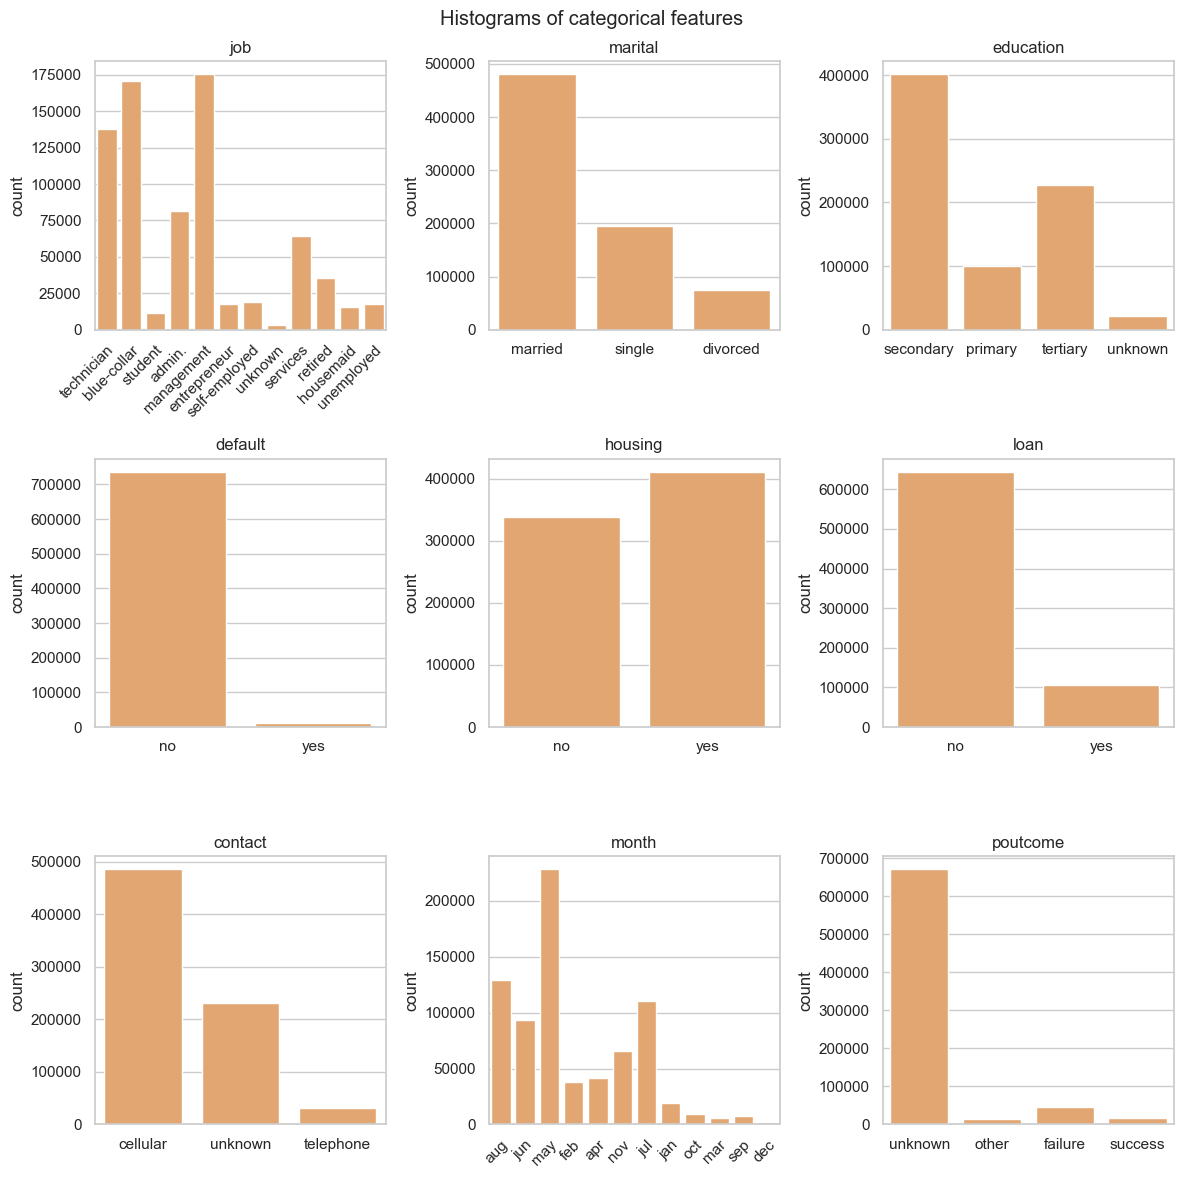

In [12]:
plotting.plotting_countplot_categorical_features(data, cat_features_origin)

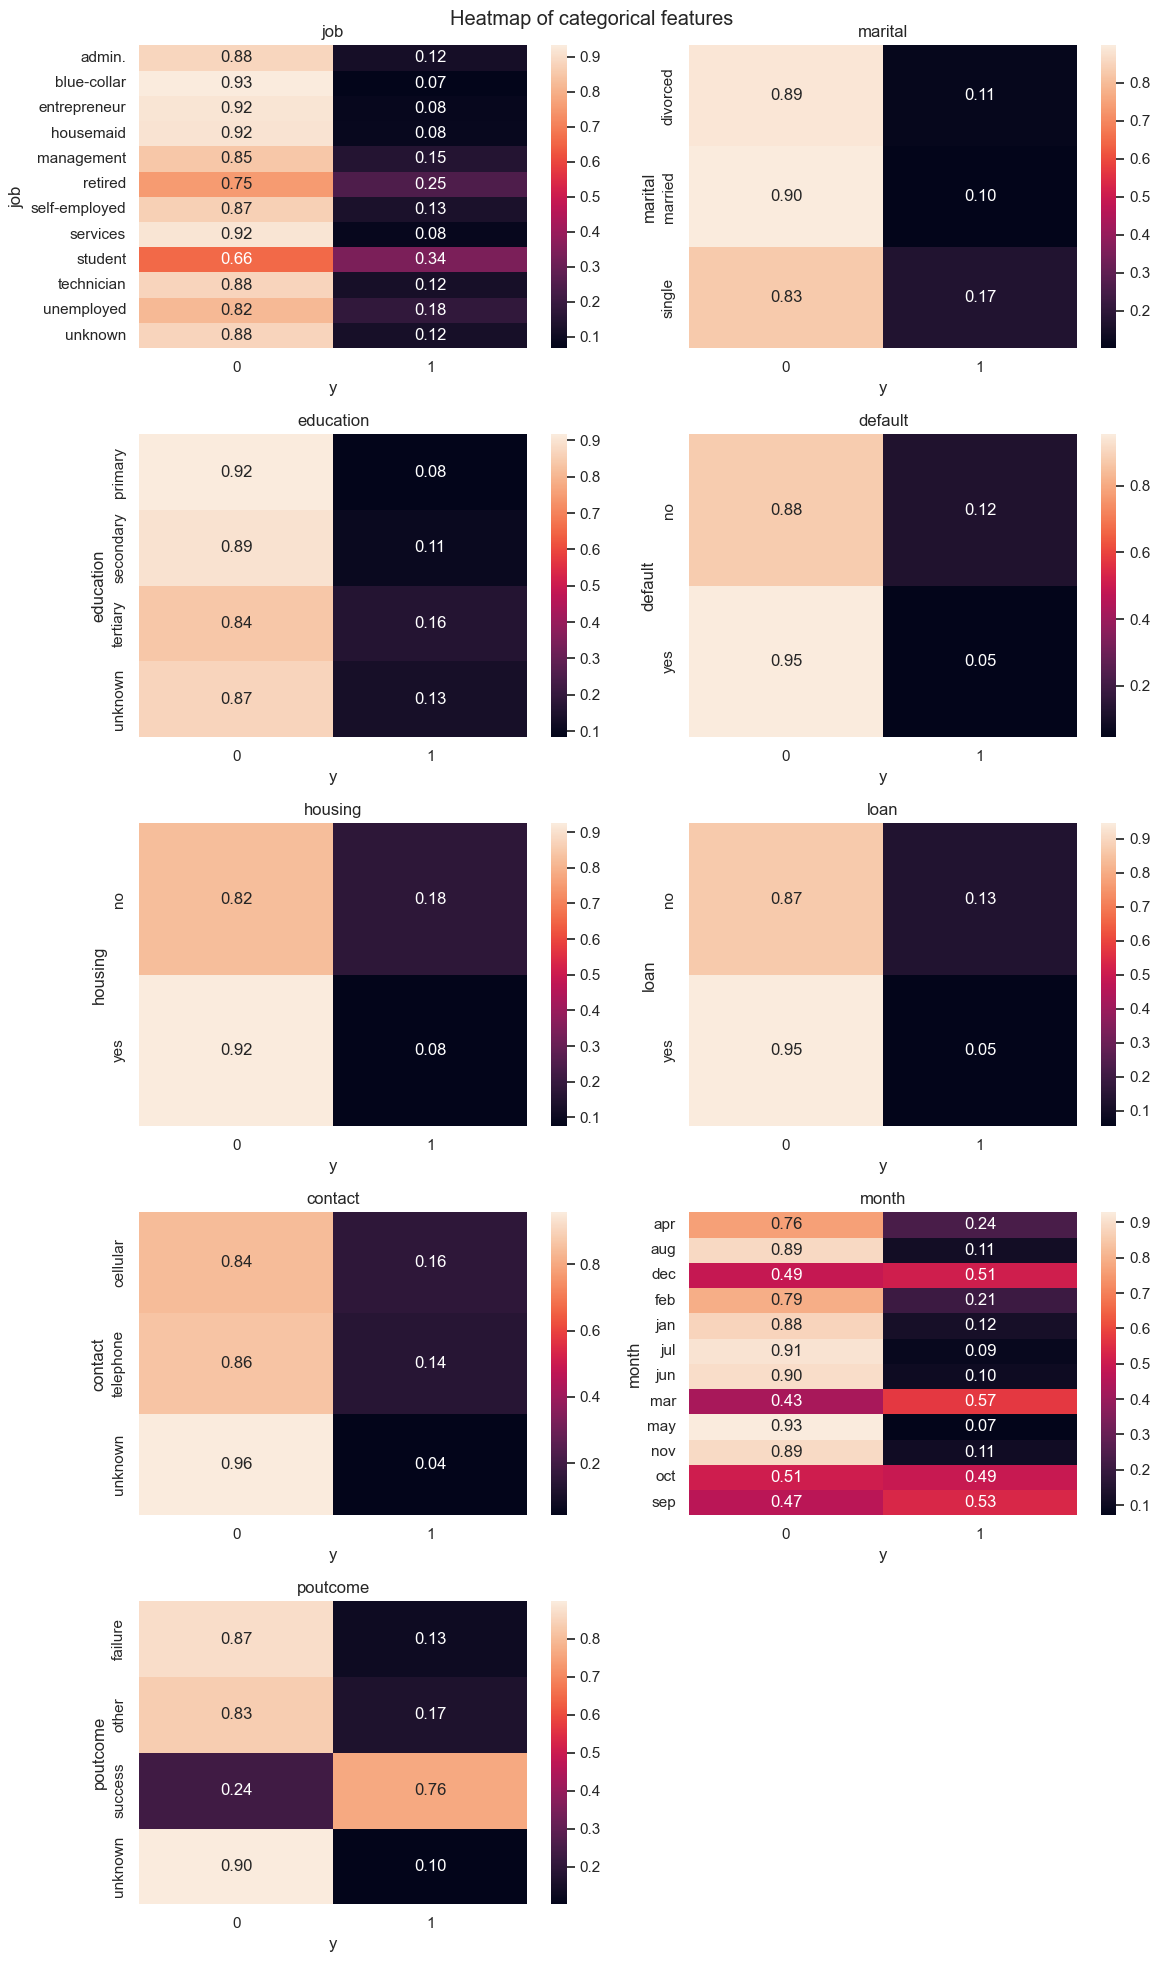

In [13]:
plotting.plotting_heatmap_cat_features(data, target, cat_features_origin)

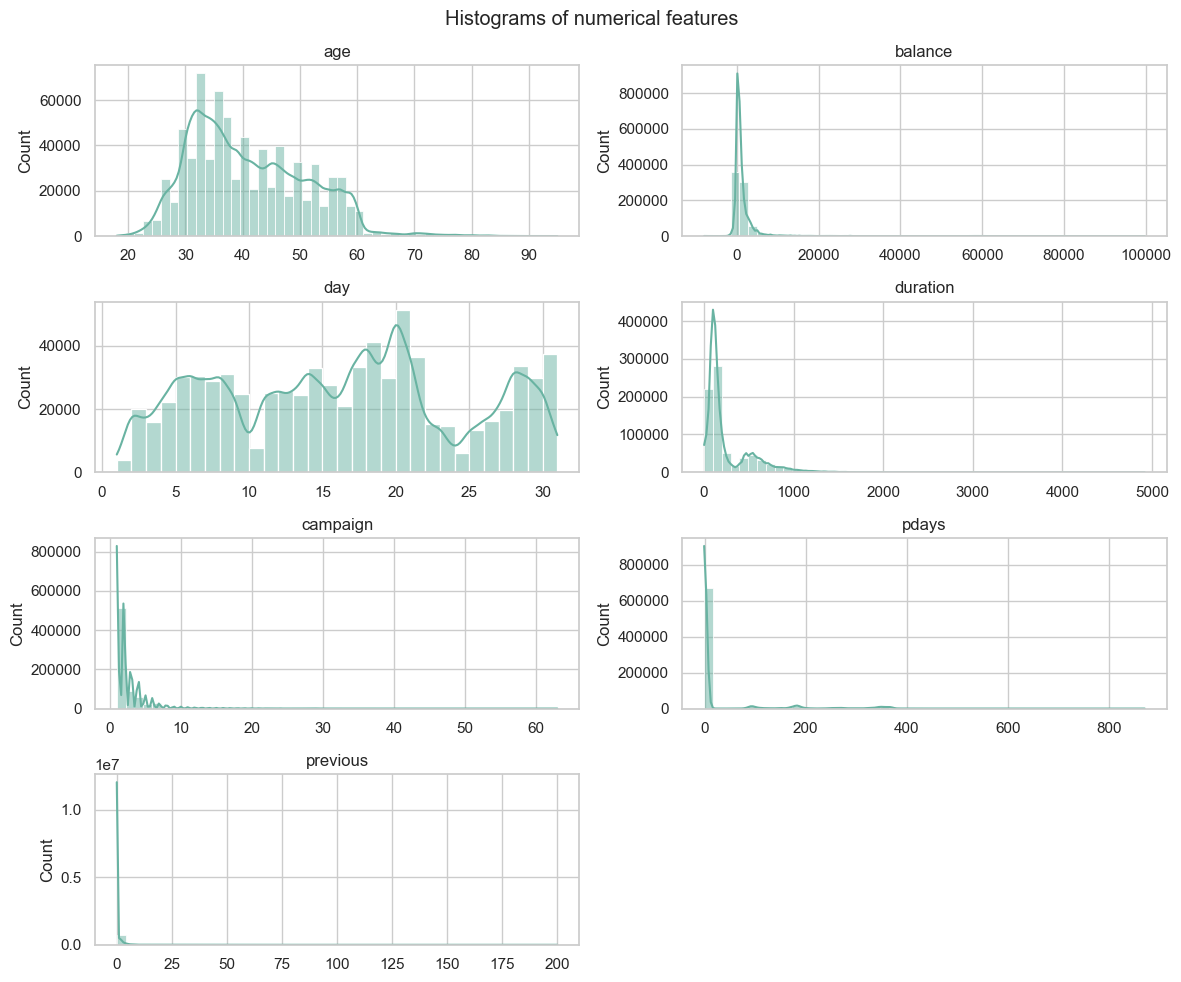

In [14]:
plotting.plotting_histogram_numerical_features(data, num_features_origin)

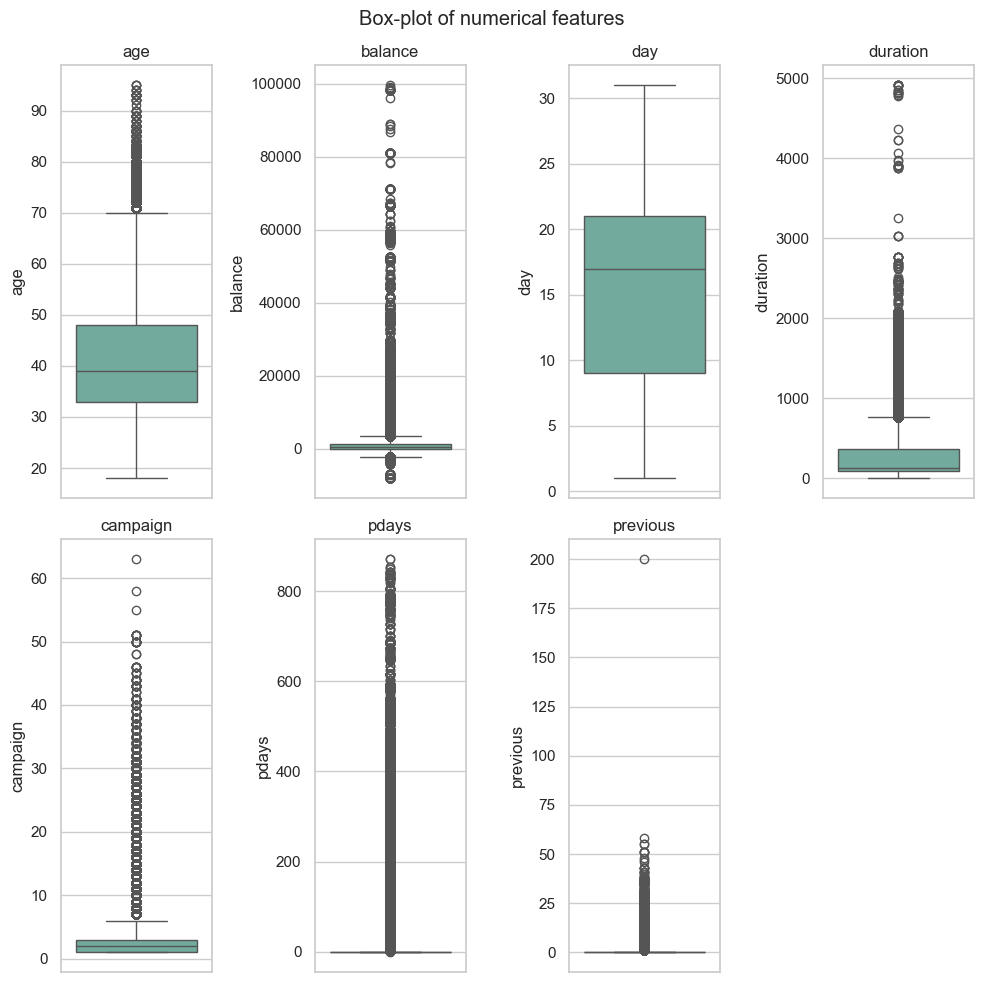

In [15]:
plotting.plotting_boxplot_numerical_features(data, num_features_origin)

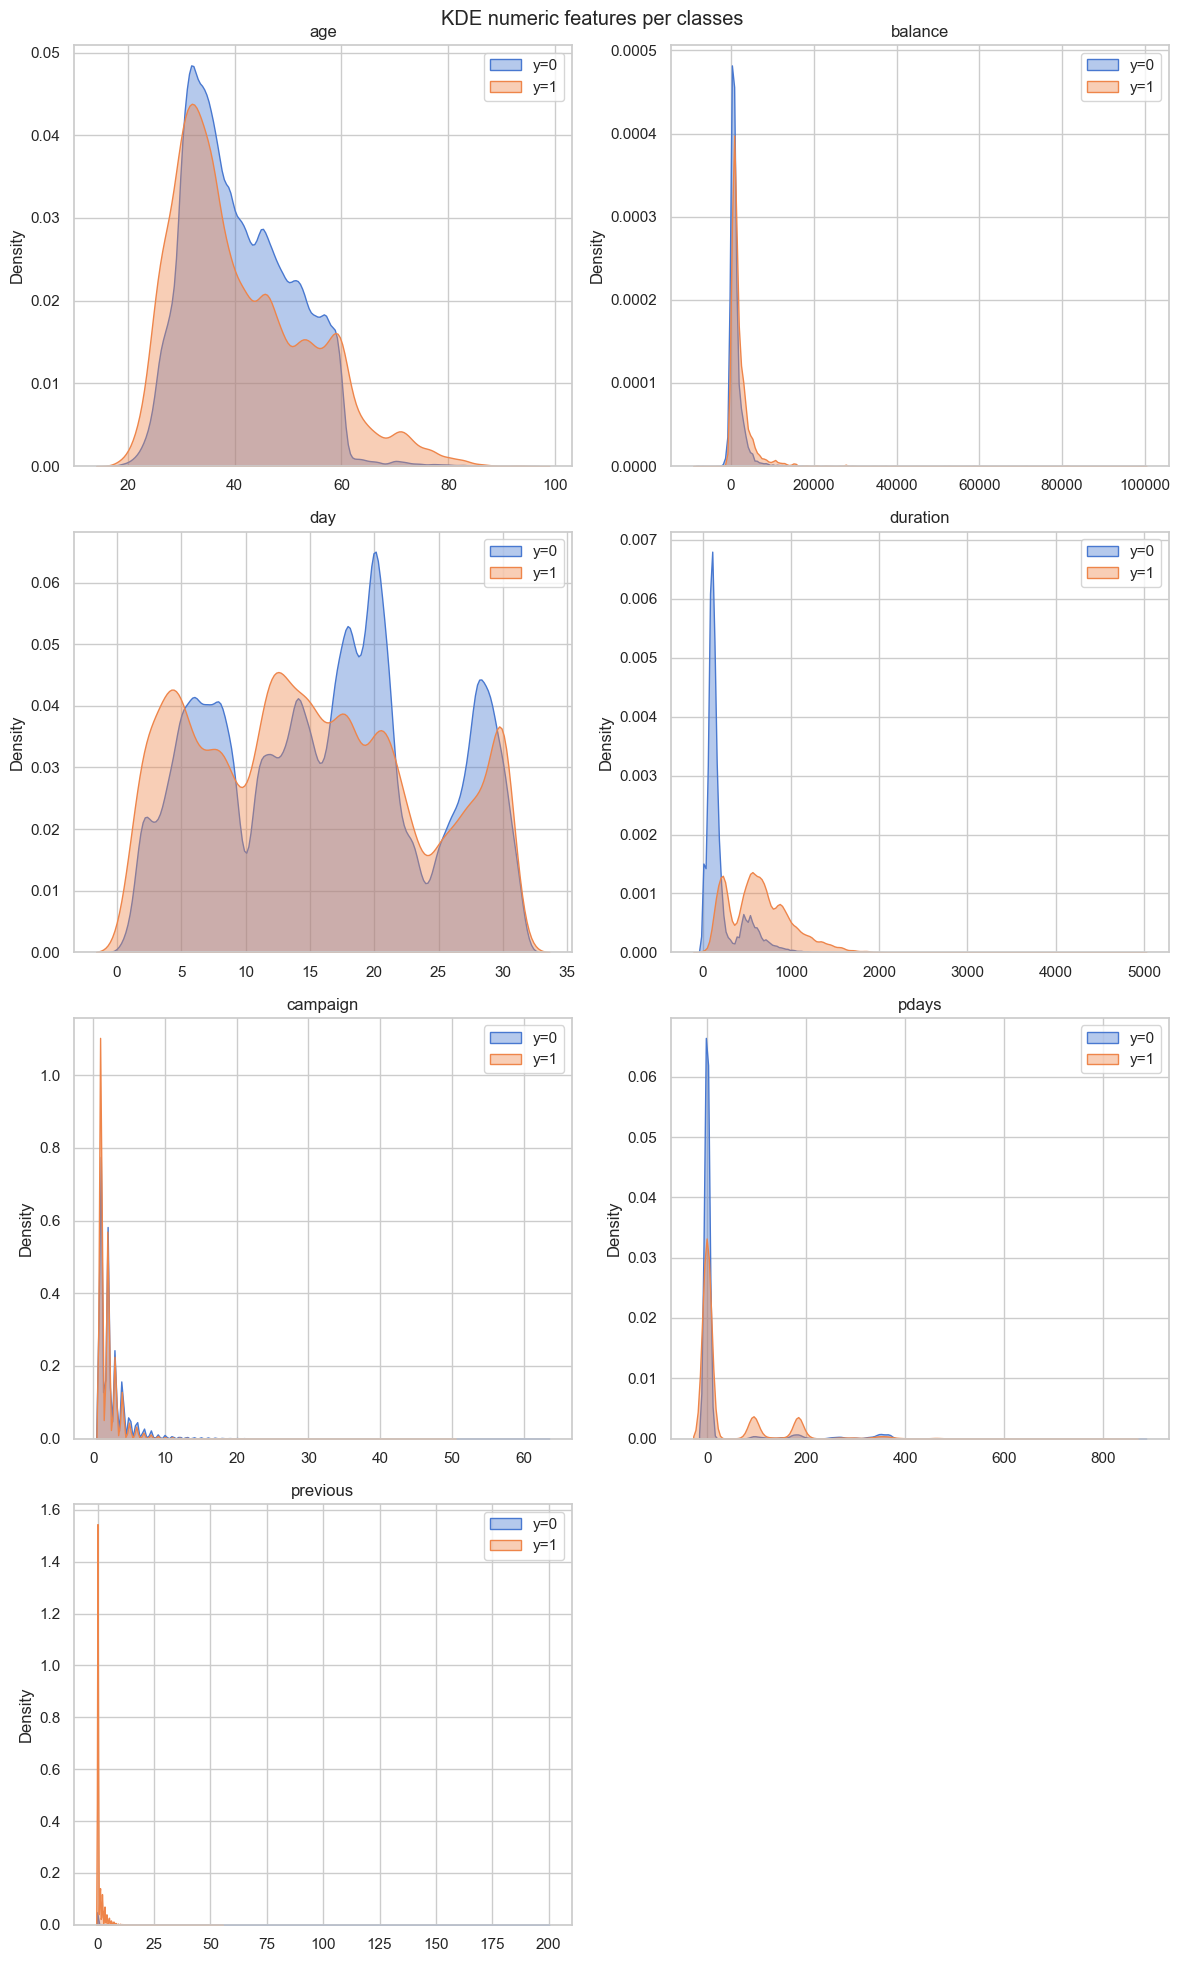

In [16]:
plotting.plotting_kde_per_target(data, target, num_features_origin)

In [44]:
drop_idx = data[data.previous == max(data.previous)].index
data = data.drop(drop_idx)
target = target.drop(drop_idx)
data_full = data_full.drop(drop_idx)
data_ids = pd.DataFrame(data_ids).drop(drop_idx)

data.shape[0], target.size

(749999, 749999)

In [ ]:
# data_full = data_full.drop(drop_idx)

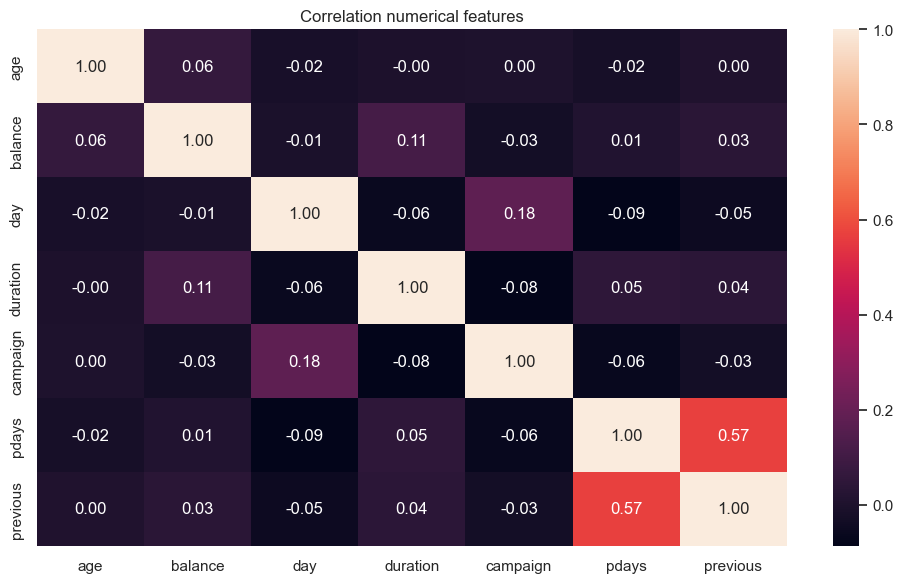

In [18]:
corr = data[num_features_origin].corr()

plt.figure()
sns.heatmap(data=corr, annot=True, fmt=".2f")
plt.title("Correlation numerical features")
plt.tight_layout()
plt.show()

In [19]:
data_full.groupby(by="y")["previous"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,659511.0,0.239083,1.200375,0.0,0.0,0.0,0.0,58.0
1,90488.0,0.729721,1.907375,0.0,0.0,0.0,0.0,55.0


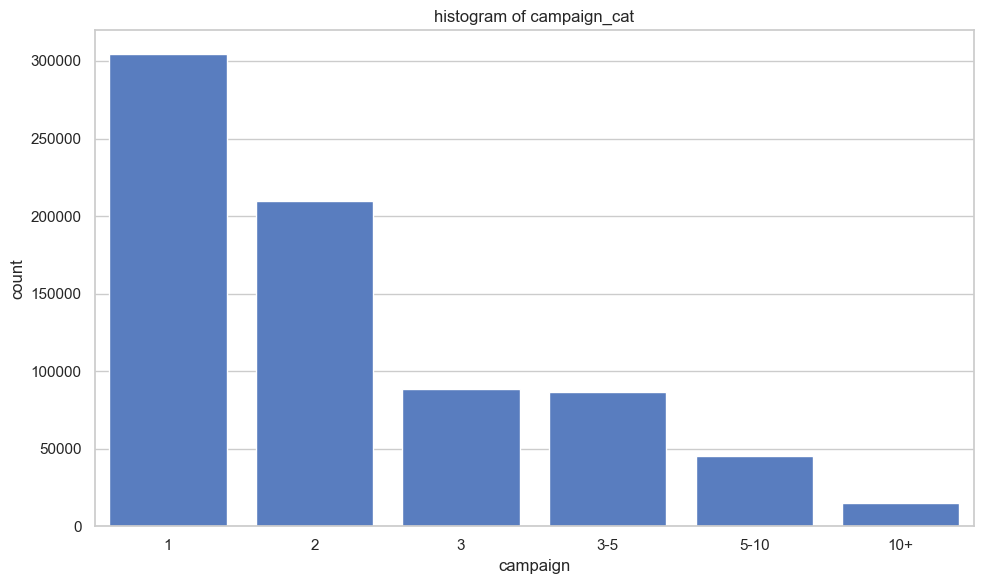

In [20]:
campaign_cat = transforms.campaign_categorical(data)

plt.figure()
sns.countplot(x=campaign_cat)
plt.title("histogram of campaign_cat")
plt.tight_layout()
plt.show()

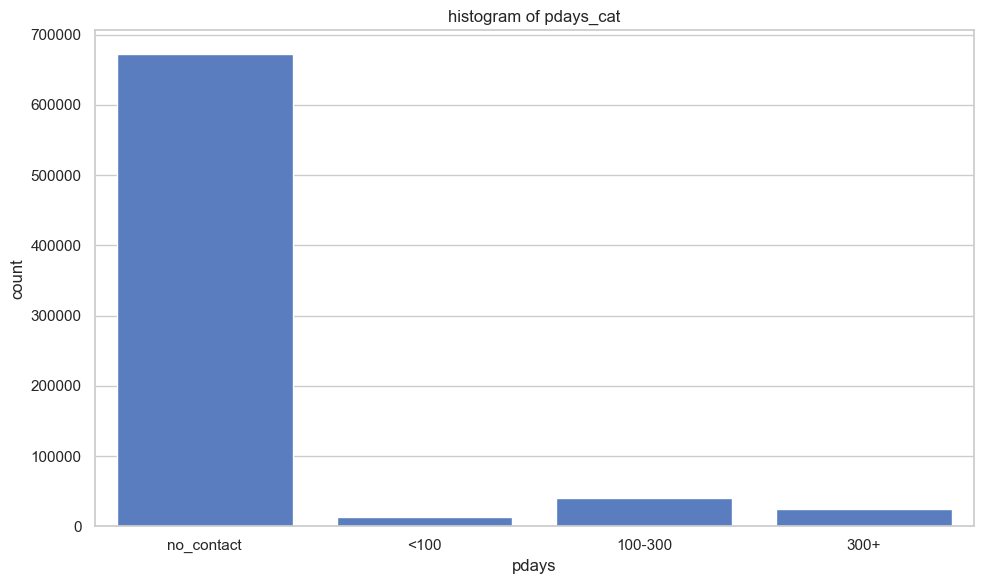

In [21]:
pdays_cat = transforms.pdays_categorical(data)

plt.figure()
sns.countplot(x=pdays_cat)
plt.title("histogram of pdays_cat")
plt.tight_layout()
plt.show()

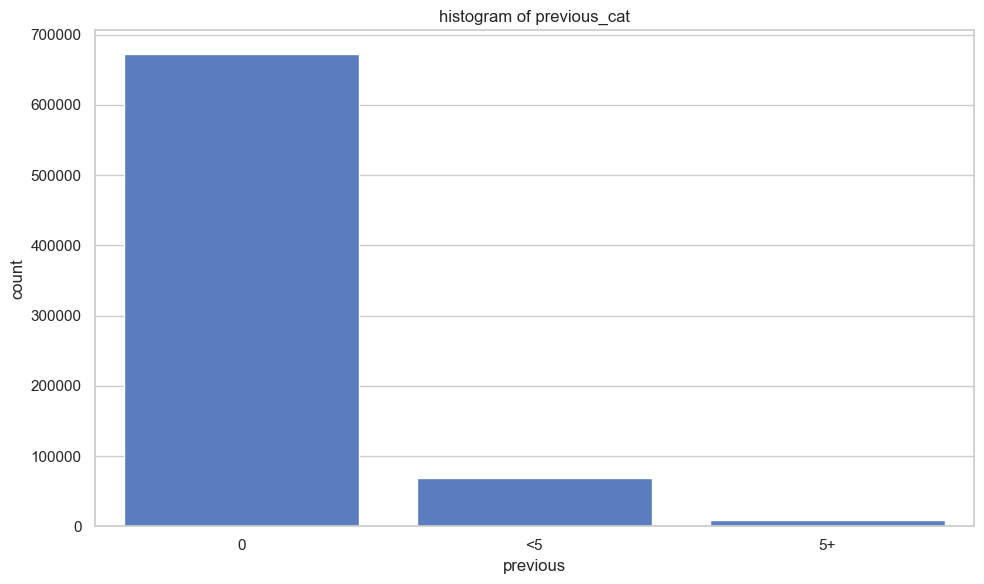

In [22]:
previous_cat = transforms.previous_categorical(data)

plt.figure()
sns.countplot(x=previous_cat)
plt.title("histogram of previous_cat")
plt.tight_layout()
plt.show()

In [45]:
data_ids

,id
0,0
1,1
2,2
3,3
4,4
...,...
749995,749995
749996,749996
749997,749997
749998,749998


In [46]:
path_data_save = ROOT / "data/processed/"
io_utils.save_df_parquet(data, path_data_save / "clean_data_features.parquet")
io_utils.save_df_parquet(target, path_data_save / "clean_target.parquet")
io_utils.save_df_parquet(data_ids, path_data_save / "clean_data_ids.parquet")

In [35]:
was_contact = (data.pdays != -1).astype(int)

crosstab = pd.crosstab(was_contact, target, normalize="index")
crosstab

y,0,1
pdays,,
0,0.898097,0.101903
1,0.716818,0.283182
